In [136]:
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression, Lasso, OrthogonalMatchingPursuit
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
import scipy
import scipy.stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import math

%matplotlib inline

In [140]:
numbers_X,numbers_y = [],[]

n = 100
sin = np.linspace(0,2*np.pi,n)

#print(numbers_X)
#print("---")
#print(numbers_y)
plt.scatter(, index=sin,c="red")

TypeError: scatter() missing 1 required positional argument: 'y'

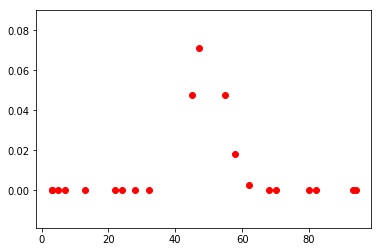

In [133]:
sp_numbers_X,sp_numbers_y = [],[]
mu = 50
sigma = 20
for i in range(20):
    gauss = np.random.randint(0,100)
    f = lambda x: (math.exp(-(x-mu)**2/(2*sigma)) / math.sqrt(2*math.pi*sigma))   
    sp_numbers_X.append(gauss)
    sp_numbers_y.append(f(gauss))
#print(numbers_X)
#print("---")
#print(numbers_y)
plt.scatter(sp_numbers_X,sp_numbers_y, c="red")

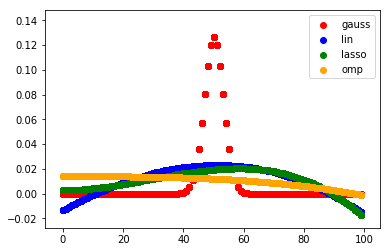

(1000, 1) (1000,)


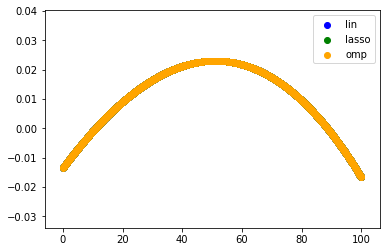

In [134]:
#create model
lin = LinearRegression() 
lasso = Lasso() 
omp = OrthogonalMatchingPursuit()

train_X = np.empty(len(numbers_X))
train_y = np.empty(len(numbers_y))
sp_train_X = np.empty(len(sp_numbers_X))
sp_train_y = np.empty(len(sp_numbers_y))

train_X[:] = numbers_X
train_y[:] = numbers_y
sp_train_X[:] = sp_numbers_X
sp_train_y[:] = sp_numbers_y

#train_X=scipy.stats.zscore(numbers_X)
#train_y=scipy.stats.zscore(numbers_y)
#sp_train_X=scipy.stats.zscore(sp_numbers_X)
#sp_train_y=scipy.stats.zscore(sp_numbers_y)

X_train=train_X.reshape(-1,1)
y_train=train_y.reshape(-1,1)
sp_train_X=sp_train_X.reshape(-1,1)
sp_train_y=sp_train_y.reshape(-1,1)

cubic = PolynomialFeatures(degree=3)
X_cubic = cubic.fit_transform(X_train)


""""
X_df = pd.DataFrame(train_X,columns = ["X"])
y_df = pd.DataFrame(train_y,columns = ["y"])
normal_df = pd.concat([X_df,y_df],axis=1)
sp_X_df = pd.DataFrame(sp_train_X,columns = ["X"])
sp_y_df = pd.DataFrame(sp_train_y,columns = ["y"])
sparse_df = pd.concat([sp_X_df,sp_y_df],axis=1)

print(normal_df)
print(sparse_df)
"""

#normal training
#lin.fit(X_train,train_y)
#lasso.fit(X_train,train_y)
#omp.fit(X_train,train_y)
lin.fit(X_cubic,train_y)
lasso.fit(X_cubic,train_y)
omp.fit(X_cubic,train_y)

#prediction
#lin_pred = lin.predict(X_train)
#lasso_pred = lasso.predict(X_train)
#omp_pred = omp.predict(X_train)
lin_pred = lin.predict(X_cubic)
lasso_pred = lasso.predict(X_cubic)
omp_pred = omp.predict(X_cubic)


#print(lin_pred)
#print(lin_pred.reshape(len(train_X)))
#plot
#print(X_cubic.shape,lin_pred.shape)
plt.scatter(X_train,train_y,label="gauss",c="red")
plt.scatter(X_train,lin_pred,label="lin",c="blue")
plt.scatter(X_train,lasso_pred.reshape(len(train_X)),label="lasso", c="green")
plt.scatter(X_train,omp_pred.reshape(len(train_X)),label="omp",c="orange")
plt.legend()
plt.show()
#plot test
test_X  = np.linspace(0,100,1000).reshape(1000,1)
test_X_cubic = cubic.fit_transform(test_X)
test_lin_pred = lin.predict(test_X_cubic)
print(test_X.shape,test_lin_pred.shape)
plt.scatter(test_X,test_lin_pred.reshape(len(test_X)),label="lin",c="blue")
plt.scatter(test_X,test_lin_pred.reshape(len(test_X)),label="lasso",c="green")
plt.scatter(test_X,test_lin_pred.reshape(len(test_X)),label="omp",c="orange")
plt.legend()
plt.show()

In [ ]:
sp_X_cubic = cubic.fit_transform(sp_X_train)
lin.fit(sp_X_cubic,sp_train_y)
lasso.fit(sp_X_cubic,sp_train_y)
omp.fit(sp_X_cubic,sp_train_y)
lin_pred = lin.predict(sp_X_cubic)
lasso_pred = lasso.predict(sp_X_cubic)
omp_pred = omp.predict(sp_X_cubic)